<a href="https://colab.research.google.com/github/Lia0107/FYP_Azzstornish_Shoe_Website/blob/main/HandGesture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing required Libraries

In [ ]:
import os

In [ ]:
import glob

In [ ]:
from IPython.display import display, Image

In [ ]:
from IPython import display

In [ ]:
display.clear_output()

## Check for the access for GPU

In [ ]:
!nvidia-smi

Sun Mar 30 18:15:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
HOME = os.getcwd()

In [ ]:
print(HOME)

/content


## Install Ultralytics using PIP

In [ ]:
!pip install ultralytics

Checking if YOLOv8 is Installed and is working fine

In [ ]:
import ultralytics

In [ ]:
ultralytics.checks()

Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 41.4/235.7 GB disk)


## Import Hand Gesture ASL from roboflow

In [ ]:
!mkdir /content/datasets

mkdir: cannot create directory ‘/content/datasets’: File exists


In [ ]:
!pwd

/content


In [ ]:
%cd /content/datasets

/content/datasets


In [ ]:
!pwd

/content/datasets


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="fKCJGst3X0agvb8zVqh4")
project = rf.workspace("cecilia-ggvz6").project("asldetection-o5fgv")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


## Train the custom dataset

In [ ]:
%cd /content/datasets

/content/datasets


In [ ]:
%cd /content/datasets/ASLDetection-1

/content/datasets/ASLDetection-1


In [ ]:
#as this is a small dataset so I only train for 70 epochs, but you can adjust based on your desire
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data=/content/datasets/ASLDetection-1/data.yaml epochs=70 imgsz=640

/content
100% 49.7M/49.7M [00:00<00:00, 238MB/s]
Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/ASLDetection-1/data.yaml, epochs=70, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fal

In [ ]:
!ls {HOME}/runs/detect/train

args.yaml					     R_curve.png	  val_batch0_labels.jpg
confusion_matrix_normalized.png			     results.csv	  val_batch0_pred.jpg
confusion_matrix.png				     results.png	  val_batch1_labels.jpg
events.out.tfevents.1743358603.f00a355f0e34.11447.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					     train_batch1860.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch1861.jpg  val_batch2_pred.jpg
labels.jpg					     train_batch1862.jpg  weights
P_curve.png					     train_batch1.jpg
PR_curve.png					     train_batch2.jpg


## Displaying Confusion Matrix

/content


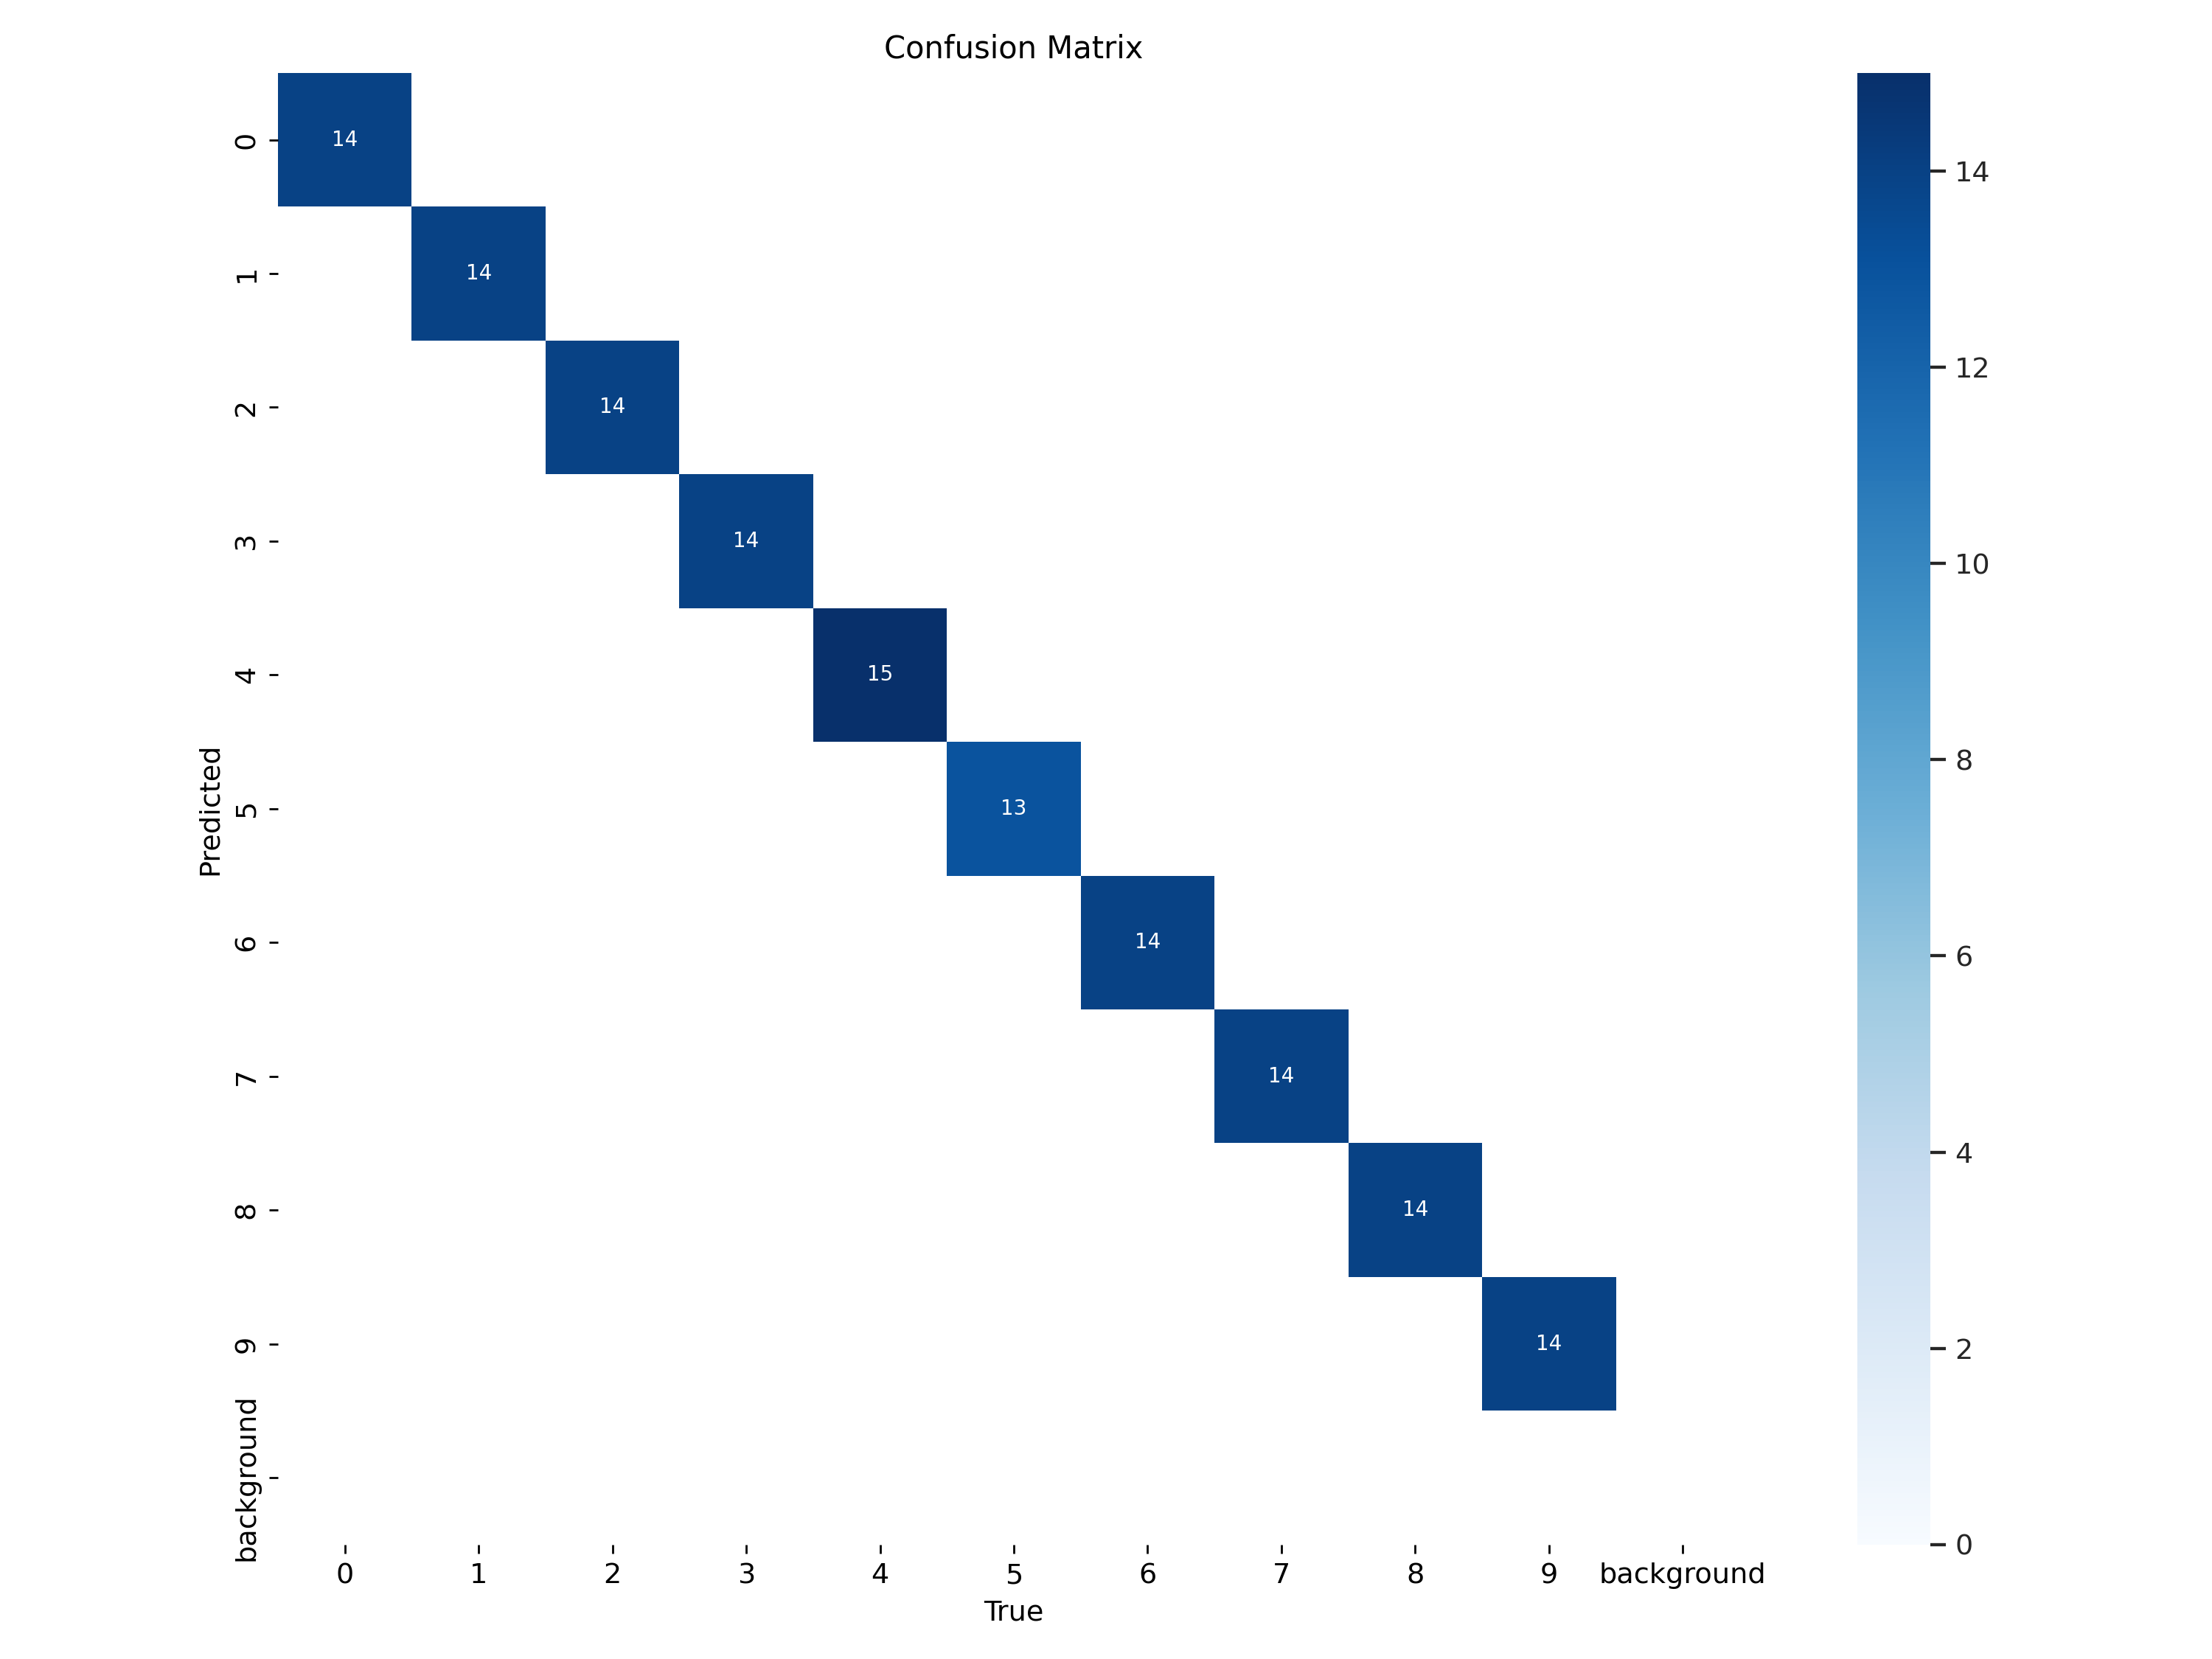

In [ ]:
# the clean confusion matrix shows that it has very high precision
%cd /content
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=900)

## Training and Validation Loss

/content


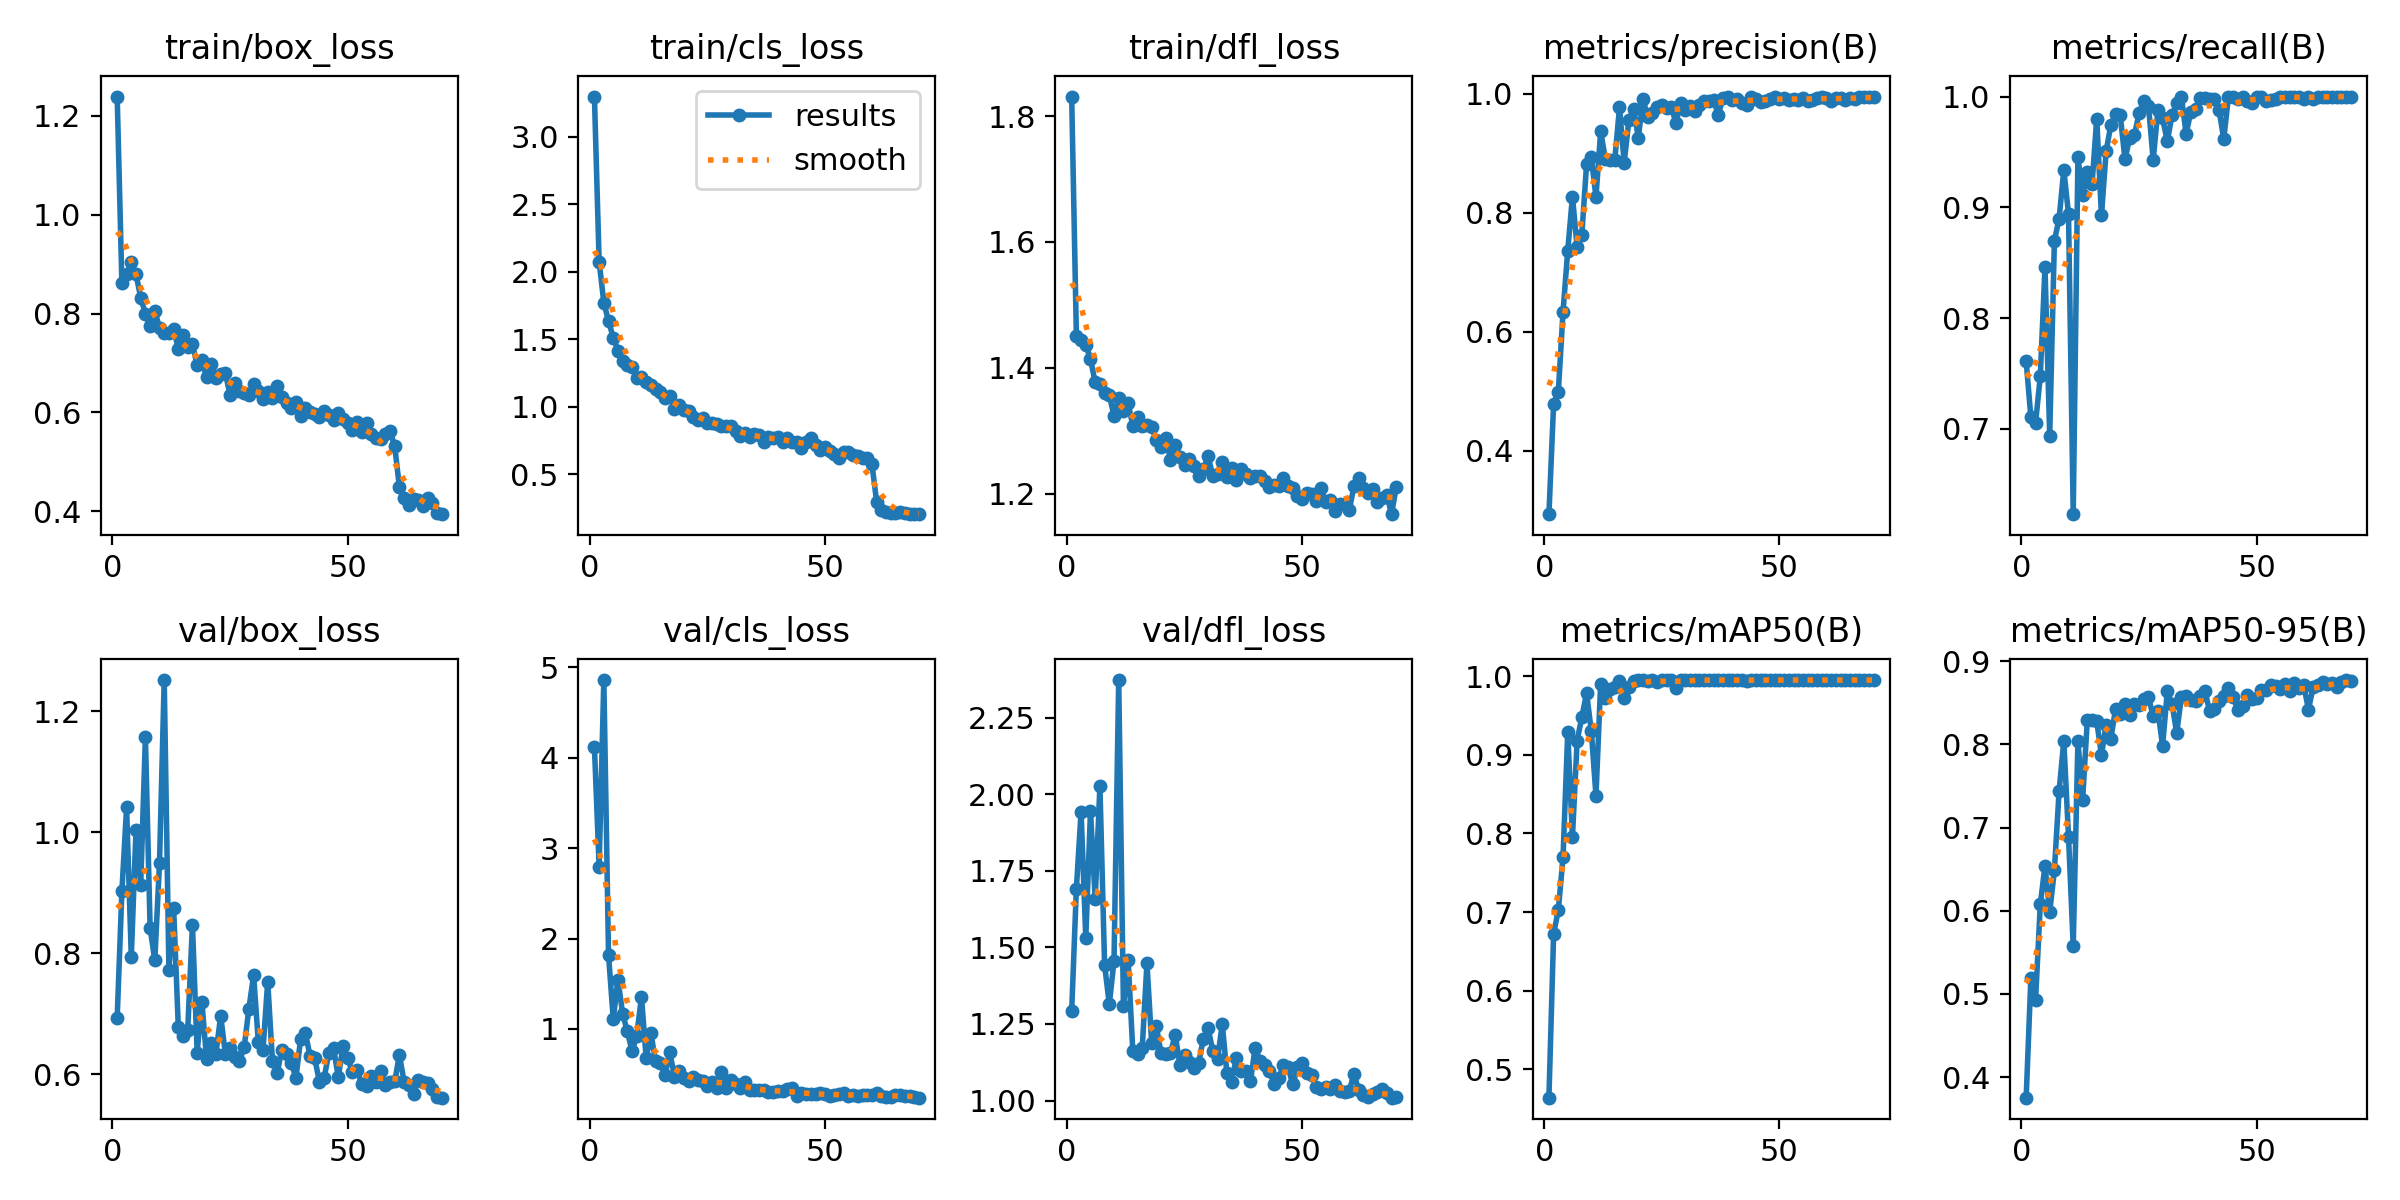

In [ ]:
%cd {HOME}
Image (filename=f'{HOME}/runs/detect/train/results.png', width=900)

/content


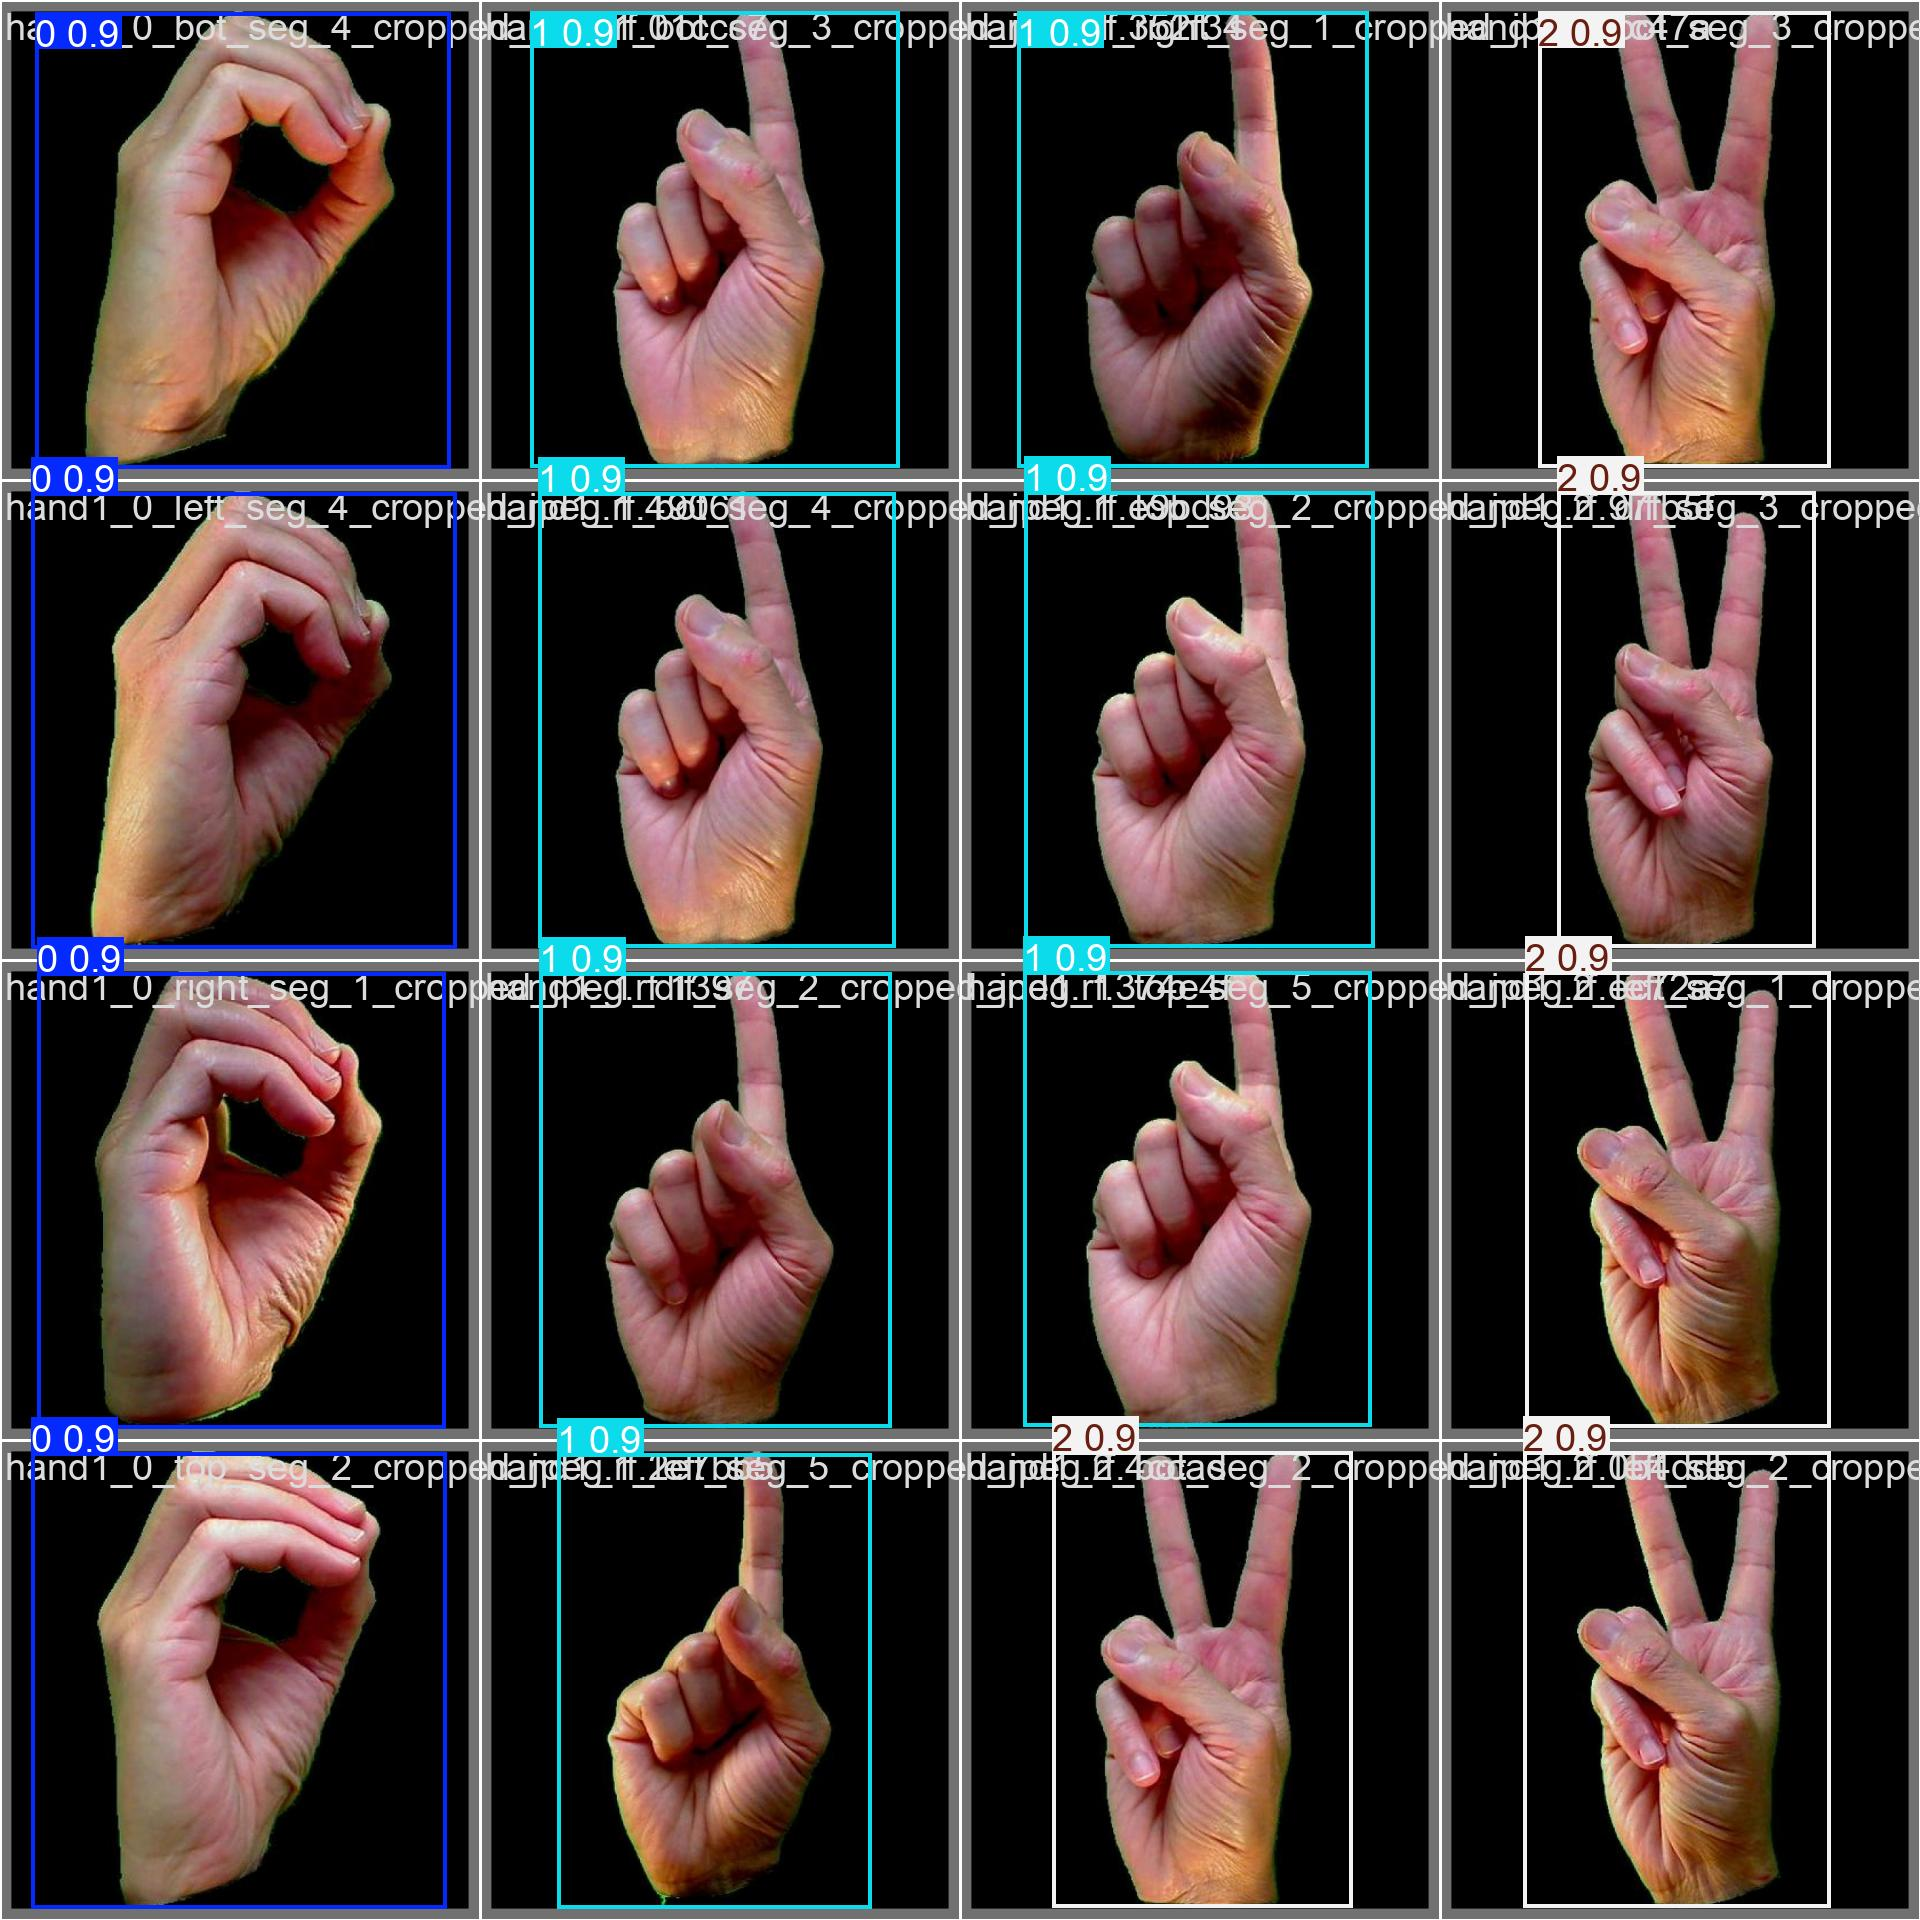

In [ ]:
#taking a look of how the model is behaving
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validating Custom Model

In [ ]:
#taking model best weights and use them to validate model
#the difference between previous and this session is that in here we use our mode=val instead of train

%cd {HOME}
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/datasets/ASLDetection-1/data.yaml

/content
Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,845,550 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/ASLDetection-1/valid/labels.cache... 140 images, 0 backgrounds, 0 corrupt: 100% 140/140 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 9/9 [00:03<00:00,  2.27it/s]
                   all        140        140      0.995          1      0.995      0.877
                     0         14         14      0.993          1      0.995      0.968
                     1         14         14      0.996          1      0.995      0.677
                     2         14         14      0.996          1      0.995      0.821
                     3         14         14      0.993          1      0.995      0.905
                     4         15         15          1          1      0.995      0.913
                     5         1

## Inference with Custom Model

In [ ]:
#test the model on test dataset images with no annotation
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/datasets/ASLDetection-1/test/images

/content
Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,845,550 parameters, 0 gradients, 78.7 GFLOPs

image 1/70 /content/datasets/ASLDetection-1/test/images/hand1_0_bot_seg_1_cropped_jpeg.rf.5442952bcbd49bde784d3e52a6597b57.jpg: 640x640 1 0, 37.0ms
image 2/70 /content/datasets/ASLDetection-1/test/images/hand1_0_right_seg_5_cropped_jpeg.rf.56eb7a9b5a63da0d0edb53266763fad1.jpg: 640x640 1 0, 37.1ms
image 3/70 /content/datasets/ASLDetection-1/test/images/hand1_0_top_seg_4_cropped_jpeg.rf.692acb8418e991e2aaf79cedf84aedfc.jpg: 640x640 1 0, 37.0ms
image 4/70 /content/datasets/ASLDetection-1/test/images/hand1_1_dif_seg_3_cropped_jpeg.rf.714bc8a0f502680c18ba820eb2379a03.jpg: 640x640 1 1, 37.0ms
image 5/70 /content/datasets/ASLDetection-1/test/images/hand1_1_top_seg_1_cropped_jpeg.rf.051579963107b7d0df1790b3b18f35fa.jpg: 640x640 1 1, 37.0ms
image 6/70 /content/datasets/ASLDetection-1/test/images/hand1_1_top_seg_4_cropped_jp

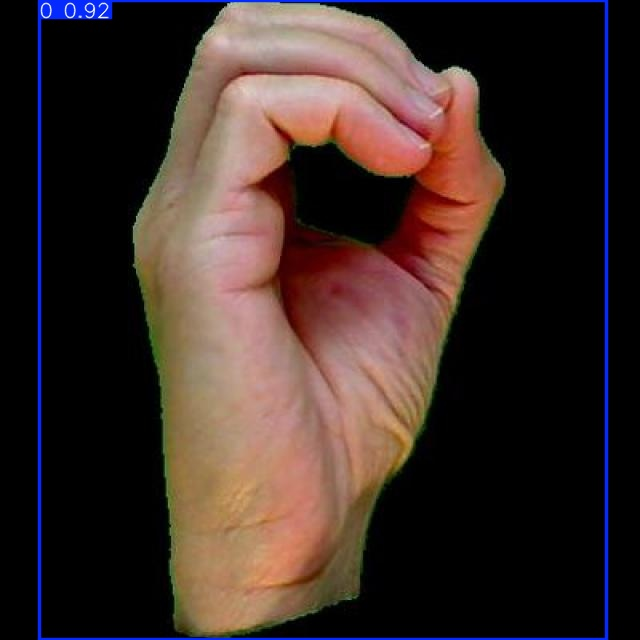

In [ ]:
Image("/content/runs/detect/predict/hand1_0_bot_seg_1_cropped_jpeg.rf.5442952bcbd49bde784d3e52a6597b57.jpg")

##Test on random videos

In [ ]:
!gdown --id 1W2wOLrLTrlBotNe1IVF-LiOLdV6Iuo3D -O video.mp4

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1W2wOLrLTrlBotNe1IVF-LiOLdV6Iuo3D
To: /content/video.mp4
100% 3.28M/3.28M [00:00<00:00, 158MB/s]


In [ ]:
%cd /content
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source='/content/video.mp4'

/content
Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,845,550 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (frame 1/607) /content/video.mp4: 640x384 1 8, 53.3ms
video 1/1 (frame 2/607) /content/video.mp4: 640x384 1 1, 1 8, 25.1ms
video 1/1 (frame 3/607) /content/video.mp4: 640x384 1 8, 25.1ms
video 1/1 (frame 4/607) /content/video.mp4: 640x384 1 1, 1 8, 25.0ms
video 1/1 (frame 5/607) /content/video.mp4: 640x384 1 8, 25.0ms
video 1/1 (frame 6/607) /content/video.mp4: 640x384 (no detections), 21.7ms
video 1/1 (frame 7/607) /content/video.mp4: 640x384 1 8, 19.9ms
video 1/1 (frame 8/607) /content/video.mp4: 640x384 (no detections), 19.8ms
video 1/1 (frame 9/607) /content/video.mp4: 640x384 (no detections), 19.8ms
video 1/1 (frame 10/607) /content/video.mp4: 640x384 (no detections), 19.9ms
video 1/1 (frame 11/607) /content/video.mp4: 640x384 (no detections), 19.9ms
video 1/1 (frame 12/607) /content/video.mp4: 640x3

##Display Video

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os
# input video path
save_path = '/content/runs/detect/predict2/video.avi'

# compressed video path
compressed_path = "/content/compressed_video.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# display the compressed video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
  <source src="%s" type="video/mp4">
</video>
""" % data_url)

##Export Model in TFlite format

In [ ]:
!yolo task=detect mode=export model=yolov8m.pt format=tflite

Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.30GHz)
YOLOv8m summary (fused): 92 layers, 25,886,080 parameters, 0 gradients, 78.9 GFLOPs

PyTorch: starting from 'yolov8m.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (49.7 MB)
E0000 00:00:1743360869.823242   21374 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743360869.828217   21374 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'ai-edge-litert>=1.2.0', 'onnx>=1.12.0', 'onnx2tf>=1.26.3', 'onnxslim>=0.1.31', 'tflite_support', 'onnxruntime'] not found, attempting AutoUpdate...
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is th

##Download TFLite file

In [ ]:
!zip -r /content/yolov8m_saved_model.zip /content/yolov8m_saved_model

  adding: content/yolov8m_saved_model/ (stored 0%)
  adding: content/yolov8m_saved_model/yolov8m_float16.tflite (deflated 8%)
  adding: content/yolov8m_saved_model/assets/ (stored 0%)
  adding: content/yolov8m_saved_model/saved_model.pb (deflated 8%)
  adding: content/yolov8m_saved_model/metadata.yaml (deflated 45%)
  adding: content/yolov8m_saved_model/fingerprint.pb (stored 0%)
  adding: content/yolov8m_saved_model/variables/ (stored 0%)
  adding: content/yolov8m_saved_model/variables/variables.index (deflated 33%)
  adding: content/yolov8m_saved_model/variables/variables.data-00000-of-00001 (deflated 86%)
  adding: content/yolov8m_saved_model/yolov8m_float32.tflite (deflated 17%)


In [ ]:
from google.colab import files
files.download('/content/yolov8m_saved_model.zip')
#I download whole folder for just incase cuz idw ro rerun
#for flutter, it just use only /content/yolov8m_saved_model/yolov8m_float32.tflite
#you can just directly download only a file

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>